In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_theme()

## Load dataset

In [54]:
df = pd.read_csv("datasets/boston-marathon/results2017.csv")

## Exploration data analysis

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26411 entries, 0 to 26410
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   place_overall       26410 non-null  float64
 1   bib                 26410 non-null  object 
 2   name                26410 non-null  object 
 3   age                 26410 non-null  float64
 4   gender              26410 non-null  object 
 5   city                26410 non-null  object 
 6   state               22815 non-null  object 
 7   country_residence   26410 non-null  object 
 8   contry_citizenship  1254 non-null   object 
 9   name_suffix         91 non-null     object 
 10  5k                  26410 non-null  object 
 11  10k                 26410 non-null  object 
 12  15k                 26410 non-null  object 
 13  20k                 26410 non-null  object 
 14  half                26410 non-null  object 
 15  25k                 26410 non-null  object 
 16  30k 

In [50]:
df.describe()

,place_overall,age,overall,gender_result,division_result,seconds
count,26410.000000,26410.000000,26410.000000,26410.000000,26410.000000,26411.000000
mean,13204.500000,42.587732,13206.260091,6660.973230,1588.796706,14283.309000
std,7624.054641,11.419467,7624.370496,3910.031525,1423.199500,2529.152218
min,0.000000,18.000000,1.000000,1.000000,1.000000,7777.000000
25%,6602.250000,34.000000,6604.250000,3302.250000,502.000000,12499.000000
50%,13204.500000,43.000000,13206.500000,6603.500000,1154.000000,13899.000000
75%,19806.750000,51.000000,19808.750000,9904.750000,2190.750000,15708.000000
max,26409.000000,84.000000,26411.000000,14438.000000,5846.000000,28694.000000


In [55]:
# there are a lot of countries in this dataset (109 - 92) which will cause a significant impact to the dataset
# country_code and country have different unique values
df.describe(include="O").T

,count,unique,top,freq
bib,26410,26410,14088,1
name,26410,26365,"Russell, Sean",2
gender,26410,2,M,14438
city,26410,5926,Boston,702
state,22815,68,MA,4586
country_residence,26410,91,USA,20945
contry_citizenship,1254,85,GBR,141
name_suffix,91,2,VI,54
5k,26410,1327,0:24:38,69
10k,26410,2475,-,54


In [52]:
df.head(5)

,place_overall,bib,name,age,gender,city,state,country_residence,contry_citizenship,name_suffix,...,pace,projected_time,official_time,overall,gender_result,division_result,seconds,first_name,last_name,display_name
0,0.0,11,"Kirui, Geoffrey",24.0,M,Keringet,NaN,KEN,NaN,NaN,...,0:04:57,-,2:09:37,1.0,1.0,1.0,7777,Geoffrey,Kirui,Geoffrey Kirui
1,1.0,17,"Rupp, Galen",30.0,M,Portland,OR,USA,NaN,NaN,...,0:04:58,-,2:09:58,2.0,2.0,2.0,7798,Galen,Rupp,Galen Rupp
2,2.0,23,"Osako, Suguru",25.0,M,Machida-City,NaN,JPN,NaN,NaN,...,0:04:59,-,2:10:28,3.0,3.0,3.0,7828,Suguru,Osako,Suguru Osako
3,3.0,21,"Biwott, Shadrack",32.0,M,Mammoth Lakes,CA,USA,NaN,NaN,...,0:05:03,-,2:12:08,4.0,4.0,4.0,7928,Shadrack,Biwott,Shadrack Biwott
4,4.0,9,"Chebet, Wilson",31.0,M,Marakwet,NaN,KEN,NaN,NaN,...,0:05:04,-,2:12:35,5.0,5.0,5.0,7955,Wilson,Chebet,Wilson Chebet


In [59]:
countries = df["country_residence"].unique()
countries

array(['KEN', 'USA', 'JPN', 'ETH', 'ZIM', 'MEX', 'BRN', 'BRA', 'CAN',
       'ITA', 'NED', 'IRL', 'BDI', 'GBR', 'GER', 'ESP', 'SUI', 'COL',
       'NOR', 'POL', 'FRA', 'RUS', 'POR', 'CRC', 'BEL', 'NZL', 'PER',
       'DOM', 'PAN', 'AUS', 'DEN', 'MAS', 'PHI', 'CHI', 'AUT', 'ARG',
       'SIN', 'CHN', 'TWN', 'GUA', 'RSA', 'HKG', 'SLO', 'EST', 'TUR',
       'EGY', 'IND', 'UAE', 'SWE', 'BER', 'KOR', 'CAY', 'FIN', 'LTU',
       'GRE', 'CRO', 'ISL', 'LUX', 'FLK', 'VEN', 'JAM', 'THA', 'HON',
       'SRB', 'CZE', 'ISR', 'MLT', 'HUN', 'ECU', 'KSA', 'ESA', 'MAR',
       'ROU', 'LAT', 'UKR', 'SMR', 'BUL', 'ALG', 'NCA', 'SVK', 'AND',
       'BAR', 'INA', 'GRN', 'URU', 'PAR', 'TCA', 'KUW', 'TRI', 'MGL',
       'NGR', nan], dtype=object)

### Check null

In [60]:
# the dataset doesn't miss any information
df.isnull().sum()

place_overall             1
bib                       1
name                      1
age                       1
gender                    1
city                      1
state                  3596
country_residence         1
contry_citizenship    25157
name_suffix           26320
5k                        1
10k                       1
15k                       1
20k                       1
half                      1
25k                       1
30k                       1
35k                       1
40k                       1
pace                      1
projected_time            1
official_time             1
overall                   1
gender_result             1
division_result           1
seconds                   0
first_name                1
last_name                 1
display_name              1
dtype: int64

I think state, contry_citizenship, bib, and name_suffix won't contribute significantly to the model, so I will drop the columns. Subsequently, I will dorp the missing rows.

In [62]:
df = df.drop(["state", "contry_citizenship", "name_suffix", "bib"], axis=1)
df = df.dropna()

In [154]:
df = df.drop(["bib"], axis=1)

### Univariate analysis

Univariate involves the analysis of a single variable.

In [140]:
alpha3 = {"ABW":"ARU","AFG":"AFG","AGO":"ANG","AIA":"AIA","ALA":" ","ALB":"ALB","AND":"AND","ARE":"UAE","ARG":"ARG","ARM":"ARM","ASM":"ASA","ATA":" ","ATF":" ","ATG":"ANT","AUS":"AUS","AUT":"AUT","AZE":"AZE","BDI":"BDI","BEL":"BEL","BEN":"BEN","BES":"AHO","BFA":"BUR","BGD":"BAN","BGR":"BUL","BHR":"BRN","BHS":"BAH","BIH":"BIH","BLM":" ","BLR":"BLR","BLZ":"BIZ","BMU":"BER","BOL":"BOL","BRA":"BRA","BRB":"BAR","BRN":"BRU","BTN":"BHU","BVT":" ","BWA":"BOT","CAF":"CAF","CAN":"CAN","CCK":" ","CHE":"SUI","CHL":"CHI","CHN":"CHN","CIV":"CIV","CMR":"CMR","COD":"COD","COG":"CGO","COK":"COK","COL":"COL","COM":"COM","CPV":"CPV","CRI":"CRC","CUB":"CUB","CUW":"","CXR":" ","CYM":"CAY","CYP":"CYP","CZE":"CZE","DEU":"GER","DJI":"DJI","DMA":"DMA","DNK":"DEN","DOM":"DOM","DZA":"ALG","ECU":"ECU","EGY":"EGY","ERI":"ERI","ESH":" ","ESP":"ESP","EST":"EST","ETH":"ETH","FIN":"FIN","FJI":"FIJ","FLK":"FLK","FRA":"FRA","FRO":"FAR","FSM":"FSM","GAB":"GAB","GBR":"GBR","GEO":"GEO","GGY":" ","GHA":"GHA","GIB":"GIB","GIN":"GUI","GLP":"GUD","GMB":"GAM","GNB":"GBS","GNQ":"GEQ","GRC":"GRE","GRD":"GRN","GRL":"GRL","GTM":"GUA","GUF":"FGU","GUM":"GUM","GUY":"GUY","HKG":"HKG","HMD":" ","HND":"HON","HRV":"CRO","HTI":"HAI","HUN":"HUN","IDN":"INA","IMN":" ","IND":"IND","IOT":" ","IRL":"IRL","IRN":"IRI","IRQ":"IRQ","ISL":"ISL","ISR":"ISR","ITA":"ITA","JAM":"JAM","JEY":" ","JOR":"JOR","JPN":"JPN","KAZ":"KAZ","KEN":"KEN","KGZ":"KGZ","KHM":"CAM","KIR":"KIR","KNA":"SKN","KOR":"KOR","KWT":"KUW","LAO":"LAO","LBN":"LIB","LBR":"LBR","LBY":"LBA","LCA":"LCA","LIE":"LIE","LKA":"SRI","LSO":"LES","LTU":"LTU","LUX":"LUX","LVA":"LAT","MAC":"MAC","MAF":" ","MAR":"MAR","MCO":"MON","MDA":"MDA","MDG":"MAD","MDV":"MDV","MEX":"MEX","MHL":"MSH","MKD":"MKD","MLI":"MLI","MLT":"MLT","MMR":"MYA","MNE":"MGO","MNG":"MGL","MNP":"NMA","MOZ":"MOZ","MRT":"MTN","MSR":"MNT","MTQ":"MRT","MUS":"MRI","MWI":"MAW","MYS":"MAS","MYT":"MAY","NAM":"NAM","NCL":"NCD","NER":"NIG","NFK":"NFI","NGA":"NGR","NIC":"NCA","NIU":"NIU","NLD":"NED","NOR":"NOR","NPL":"NEP","NRU":"NRU","NZL":"NZL","OMN":"OMA","PAK":"PAK","PAN":"PAN","PCN":" ","PER":"PER","PHL":"PHI","PLW":"PLW","PNG":"PNG","POL":"POL","PRI":"PUR","PRK":"PRK","PRT":"POR","PRY":"PAR","PSE":"PLE","PYF":"FPO","QAT":"QAT","REU":"REU","ROU":"ROU","RUS":"RUS","RWA":"RWA","SAU":"KSA","SDN":"SUD","SEN":"SEN","SGP":"SIN","SGS":" ","SHN":"HEL","SJM":" ","SLB":"SOL","SLE":"SLE","SLV":"ESA","SMR":"SMR","SOM":"SOM","SPM":"SPM","SRB":"SRB","SSD":"","STP":"STP","SUR":"SUR","SVK":"SVK","SVN":"SLO","SWE":"SWE","SWZ":"SWZ","SXM":"","SYC":"SEY","SYR":"SYR","TCA":"TKS","TCD":"CHA","TGO":"TOG","THA":"THA","TJK":"TJK","TKL":" ","TKM":"TKM","TLS":"TLS","TON":"TGA","TTO":"TTO","TUN":"TUN","TUR":"TUR","TUV":"TUV","TWN":"TPE","TZA":"TAN","UGA":"UGA","UKR":"UKR","UMI":" ","URY":"URU","USA":"USA","UZB":"UZB","VAT":" ","VCT":"VIN","VEN":"VEN","VGB":"IVB","VIR":"ISV","VNM":"VIE","VUT":"VAN","WLF":"WAF","WSM":"SAM","YEM":"YEM","ZAF":"RSA","ZMB":"ZAM"}
df["country_residence"] = df["country_residence"].apply(lambda x: alpha3[x] if x in alpha3 else x)

In [146]:
countries = json.loads(open("countries.json").read())

countries_with_continent = {}

for country in countries:
    countries_with_continent[country["alpha-3"]] = {
        "region": country["region"],
        "name": country["name"],
    }

#### Country

In [147]:
df["country"] = df["country_residence"].apply(lambda x: countries_with_continent[x]["name"])
df["continent"] = df["country_residence"].apply(lambda x: countries_with_continent[x]["region"])

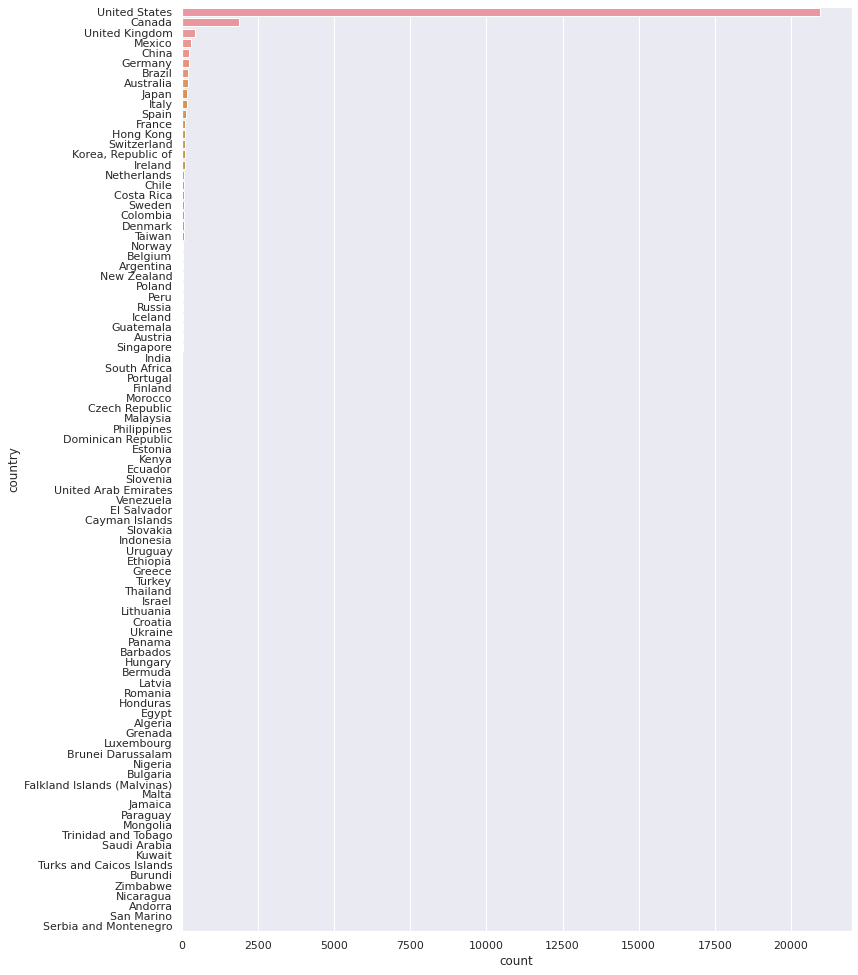

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(12, 17))
sns.countplot(y="country",
              data=df,
              ax=ax,
              order=df["country"].value_counts().index);

Because the marathon was organized in Boston - America, so it is easy to understand that America has the highest participants. But other participants are from other places like Asia, Eroupe, Africa

#### Gender

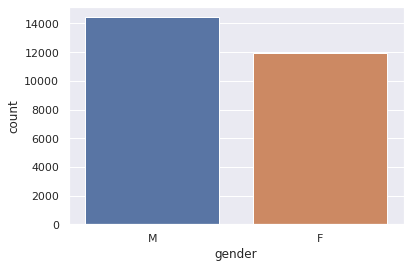

In [151]:
sns.countplot(x="gender",
              data=df,
              order=df["gender"].value_counts().index);

In [152]:
print("Percentage of the Male in dataset: %0.2f%%" % (df["gender"].value_counts()["M"] / len(df) * 100))

Percentage of the Male in dataset: 54.67%


The different percentage between two categories is not really high

#### Age

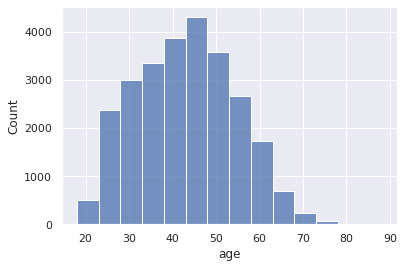

In [153]:
sns.histplot(data=df, x="age", binwidth=5);

Most of the participants have age ranging from 23 - 62. This feature data seems to have the bell shape.

#### Result second

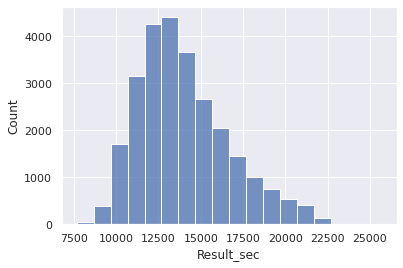

In [15]:
sns.histplot(data=df, x="result_sec", binwidth=1000);

The participants' finish time are ranging from ... - .... This feature data doesn't seem to have the bell shape.

#### Rank Gender

In [16]:
min_female_rank = df.groupby(["Gender"])["Rank_Gender"].min()["F"]
max_female_rank = df.groupby(["Gender"])["Rank_Gender"].max()["F"]

min_male_rank = df.groupby(["Gender"])["Rank_Gender"].min()["M"]
max_male_rank = df.groupby(["Gender"])["Rank_Gender"].max()["M"]

print(f"Rank of female is from {min_female_rank} to {max_female_rank}")
print(f"Rank of male is from {min_male_rank} to {max_male_rank}")

Rank of female is from 1 to 11981
Rank of male is from 1 to 14671


#### Rank Total

In [17]:
min_female_rank = df.groupby(["Gender"])["Rank_Tot"].min()["F"]
max_female_rank = df.groupby(["Gender"])["Rank_Tot"].max()["F"]

min_male_rank = df.groupby(["Gender"])["Rank_Tot"].min()["M"]
max_male_rank = df.groupby(["Gender"])["Rank_Tot"].max()["M"]

print(f"Rank of female is from {min_female_rank} to {max_female_rank}")
print(f"Rank of male is from {min_male_rank} to {max_male_rank}")

Rank of female is from 36 to 26652
Rank of male is from 1 to 26651


From the dataset, I checked and saw it has many missing positions, unlike a correct leaderboard

#### Continent

In [19]:
df["Continent"] = df["Country"].apply(lambda x: countries_with_continent[x])

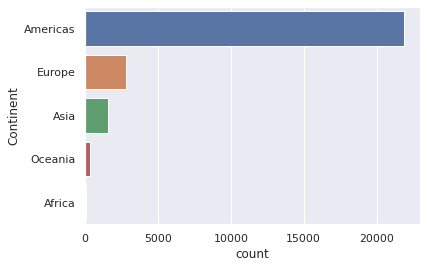

In [20]:
sns.countplot(y="Continent",
              data=df,
              order=df["Continent"].value_counts().index);

### Multivariate analysis

#### Heat map

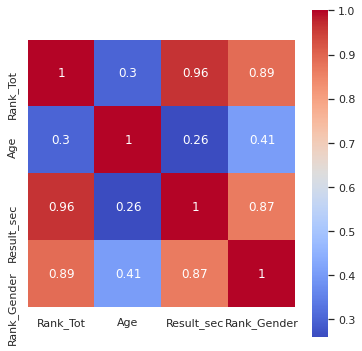

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, square=True, cmap="coolwarm", ax=ax);

It's reasonable for having these correlation like above, because they're correlated features
- Rank_Gender - Rank_Tot
- Rank_Gender - Result_sec
- Rank_Tot - Result_sec

#### Country - Rank_Gender - Male

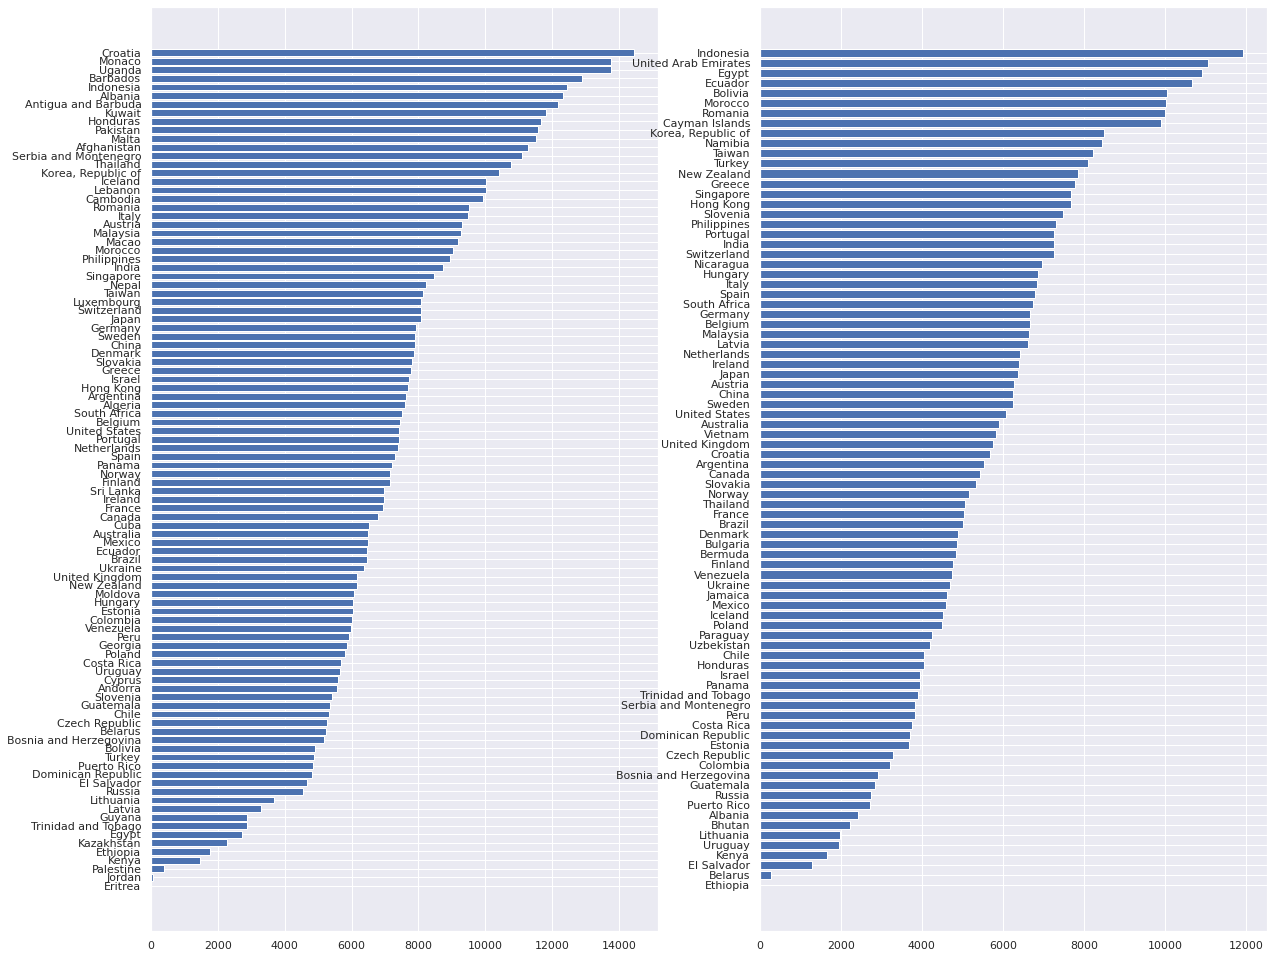

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20, 17))

data = df[df["Gender"] == "M"].groupby("Country")["Rank_Gender"].mean().sort_values(ascending=True)
ax[0].barh(data.index, data.values)

data = df[df["Gender"] == "F"].groupby("Country")["Rank_Gender"].mean().sort_values(ascending=True)
ax[1].barh(data.index, data.values)

plt.show()

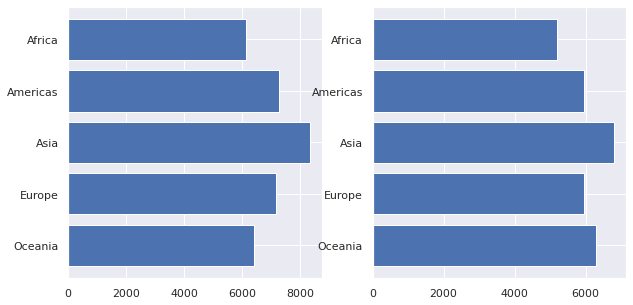

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

data = df[df["Gender"] == "M"].groupby("Continent")["Rank_Gender"].mean().sort_index(ascending=False)
ax[0].barh(data.index, data.values)

data = df[df["Gender"] == "F"].groupby("Continent")["Rank_Gender"].mean().sort_index(ascending=False)
ax[1].barh(data.index, data.values)
plt.show()

Average rank of two genders via continents is quite similiar

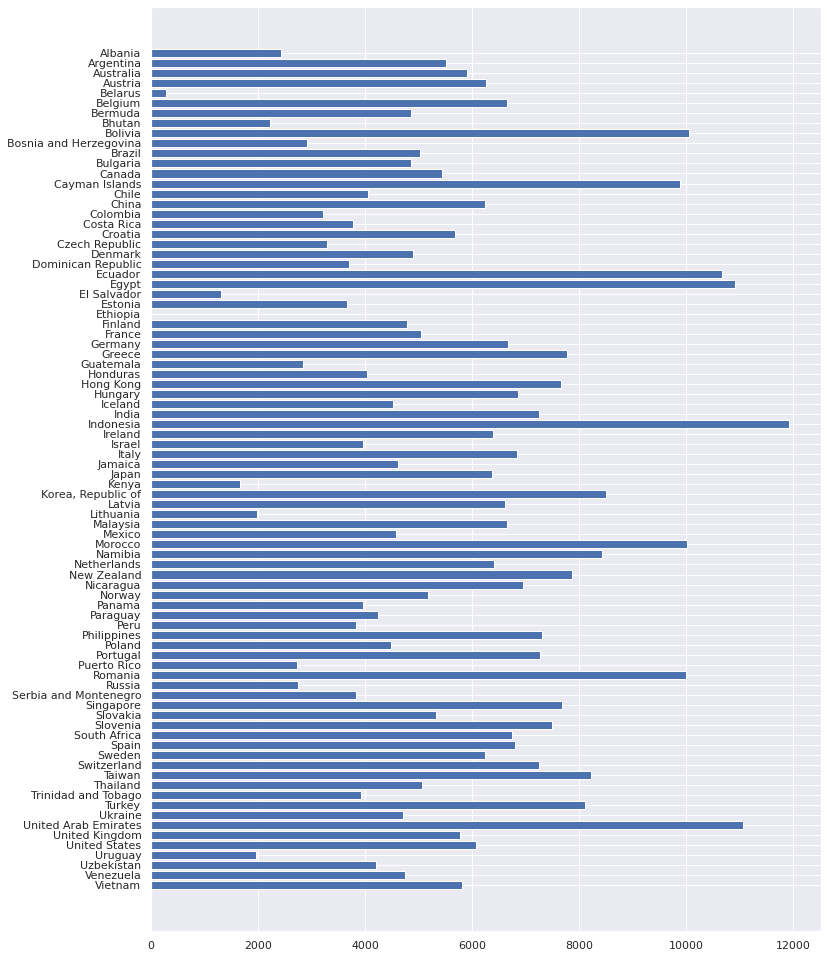

In [24]:
data = df[df["Gender"] == "F"].groupby("Country")["Rank_Gender"].mean().sort_index(ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 17))
plt.barh(data.index, data.values)
plt.show()

### Notes:
- Group people by continent